In [1]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf
from tensorflow import keras
from keras import layers
import scipy
from scipy.stats import wilcoxon

In [3]:
print(scipy.__version__)

1.7.3


In [2]:
#save all masks for chosen slices

indexVector = np.hstack((np.array(range(1,44)),np.array(range(45,59)),np.array(range(60,67)),np.array(range(68,82))))
posLocs = []
masks = []
numSlices = []
img_height = 64

for i in indexVector:
    img_data = nib.load('E:/nifti_masks/{}/nifti_mask/P1.img'.format(i)).get_fdata()
    pos = []
    for j in range(img_data.shape[2]):
        if np.max(img_data[:,:,j])>0:
            pos.append(j)
    numSlices.append(img_data.shape[2])
    if 'P2.img' in os.listdir('E:/nifti_masks/{}/nifti_mask/'.format(i)):
        img_data = nib.load('E:/nifti_masks/{}/nifti_mask/P2.img'.format(i)).get_fdata()
        for j in range(img_data.shape[2]):
            if np.max(img_data[:,:,j])>0:
                pos.append(j)
    if 'P3.img' in os.listdir('E:/nifti_masks/{}/nifti_mask/'.format(i)):
        img_data = nib.load('E:/nifti_masks/{}/nifti_mask/P3.img'.format(i)).get_fdata()
        for j in range(img_data.shape[2]):
            if np.max(img_data[:,:,j])>0:
                pos.append(j)
    posLocs.append(np.unique(pos))
    print(i)

for i in range(len(indexVector)):  
    img_data = nib.load('E:/nifti_masks/{}/nifti_mask/P1.img'.format(indexVector[i])).get_fdata()
    slices = []
    for j in range(len(posLocs[i])):
        slices.append(cv2.resize(img_data[200:328,236:364,posLocs[i][j]],(img_height,img_height)))
    if 'P2.img' in os.listdir('E:/nifti_masks/{}/nifti_mask/'.format(indexVector[i])):
        img_data = nib.load('E:/nifti_masks/{}/nifti_mask/P2.img'.format(indexVector[i])).get_fdata()
        for j in range(len(posLocs[i])):
            if np.max(img_data[:,:,posLocs[i][j]]>0):
                slices[j]=np.maximum(slices[j],cv2.resize(img_data[200:328,236:364,posLocs[i][j]],(img_height,img_height)))
    if 'P3.img' in os.listdir('E:/nifti_masks/{}/nifti_mask/'.format(indexVector[i])):
        img_data = nib.load('E:/nifti_masks/{}/nifti_mask/P3.img'.format(indexVector[i])).get_fdata()
        for j in range(len(posLocs[i])):
            if np.max(img_data[:,:,posLocs[i][j]]>0):
                slices[j]=np.maximum(slices[j],cv2.resize(img_data[200:328,236:364,posLocs[i][j]],(img_height,img_height)))
    masks.append(slices)
    print(i)

for i in range(len(masks)):
    for j in range(len(masks[i])):
        for k in range(img_height):
            for u in range(img_height):
                if masks[i][j][k,u]>0:
                    masks[i][j][k,u]=1
    print(i)

#note that [184:312,148:276] here is same as [200:328,236:364] since pics are sideways and have different axes!

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
45
46
47
48
49
50
51
52
53
54
55
56
57
58
60
61
62
63
64
65
66
68
69
70
71
72
73
74
75
76
77
78
79
80
81
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77


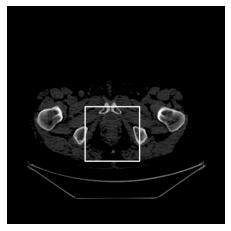

In [3]:
#plot the location of the cropping

img_data = nib.load('E:/carimas_files/1/ct.nifti.img').get_fdata()
ct=img_data[:,:,posLocs[0][0]]
ct=(ct-np.min(ct))/(np.max(ct)-np.min(ct))
for i in range(512):
    for j in range(512):
        ct[i,j]=ct[i,j]**0.5
        if 199<=i<=201 and 236<=j<=364:
            ct[i,j]=1
        if 327<=i<=329 and 236<=j<=364:
            ct[i,j]=1
        if 200<=i<=328 and 235<=j<=237:
            ct[i,j]=1
        if 200<=i<=328 and 363<=j<=365:
            ct[i,j]=1
ct=cv2.rotate(ct,cv2.cv2.ROTATE_90_CLOCKWISE)           
plt.imshow(ct,cmap='gray')
fig=plt.gcf()
plt.axis('off')
plt.show()
fig.savefig('fig1.png',bbox_inches='tight')

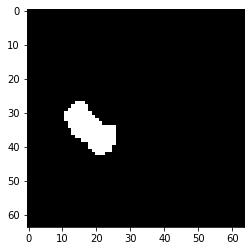

In [4]:
#plot one mask

plt.imshow(masks[0][3],cmap='gray')

(880, 64, 64)


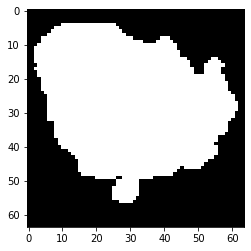

In [5]:
#plot the combination of all masks to check it is inside the cropping

comb=[]

for i in range(len(masks)):
    for j in range(len(masks[i])):
        comb.append(masks[i][j])

comb=np.array(comb)
print(comb.shape)
plt.imshow(comb.max(axis=0),cmap='gray')

In [9]:
#save the image slices corresponding to the masks

posSlices = []

for i in range(len(indexVector)):  
    img_data = nib.load('E:/carimas_files/{}/pet.nifti.img'.format(indexVector[i])).get_fdata()
    slices = []
    for j in range(len(posLocs[i])):
        slices.append(cv2.resize(img_data[200:328,236:364,posLocs[i][j]],(img_height,img_height)))
    posSlices.append(slices)

In [10]:
numPosSlices = []
for i in range(len(indexVector)):
    numPosSlices.append(len(posLocs[i]))
print(numPosSlices)

[10, 11, 12, 13, 2, 4, 12, 5, 13, 11, 27, 9, 7, 17, 5, 4, 10, 22, 5, 6, 7, 12, 4, 9, 7, 18, 28, 13, 13, 8, 7, 13, 11, 6, 8, 8, 14, 14, 11, 9, 11, 21, 11, 10, 13, 19, 14, 8, 9, 17, 9, 18, 18, 9, 5, 10, 7, 8, 7, 4, 16, 17, 5, 14, 8, 9, 13, 8, 16, 12, 11, 31, 13, 14, 11, 12, 6, 11]


In [11]:
u=[]
for i in range(78):
    for j in range(len(masks[i])):
        u.append(np.sum(masks[i][j]))
print(np.min(u))

1.0


In [12]:
def sliceIntoBinaryMask(slice,lim):

    img_height=slice.shape[0]

    img=np.zeros((img_height,img_height))

    for i in range(img_height):
        for j in range(img_height):
            if slice[i,j]>lim:
                img[i,j]=1
    
    return img

def computeDice(slice,mask,lim):

    img_height=slice.shape[0]

    TP=0
    FP=0
    FN=0

    for i in range(img_height):
        for j in range(img_height):
            if mask[i,j]==1:
                if slice[i,j]>lim:
                    TP+=1
                else:
                    FN+=1
            else:
                if slice[i,j]>lim:
                    FP+=1

    dice=2*TP/(2*TP+FP+FN)

    return dice

def optimizeLim(slice,mask):

    dices=[]

    potLimits=0.01*np.array(range(0,100))

    for lim in potLimits:
        dices.append(computeDice(slice,mask,lim))

    lim=potLimits[dices.index(max(dices))]

    return lim

def splitIntoSets(posSlices,masks,testSetPatients):

    x_train = []
    y_train = []
    l_train = []
    x_test = []
    y_test = []
    l_test = []

    for i in range(78):
        if i in testSetPatients: 
            for j in range(len(posSlices[i])):
                slice=posSlices[i][j]
                slice=(slice-np.min(slice))/(np.max(slice)-np.min(slice))
                x_test.append(slice)
                y_test.append(masks[i][j])  
                l_test.append(optimizeLim(slice,masks[i][j]))
        else:
            for j in range(len(posSlices[i])):
                slice=posSlices[i][j]
                slice=(slice-np.min(slice))/(np.max(slice)-np.min(slice))
                x_train.append(slice)
                y_train.append(masks[i][j])
                l_train.append(optimizeLim(slice,masks[i][j]))

    x_train=np.array(x_train)
    y_train=np.array(y_train)
    l_train=np.array(l_train)
    x_test=np.array(x_test)
    y_test=np.array(y_test)
    l_test=np.array(l_test)

    return([x_train,y_train,l_train,x_test,y_test,l_test])

def computeDicesFromPredictions(predMasks,y_test,limits):

    dices=[]

    for i in range(len(y_test)):
        dices.append(computeDice(predMasks[i],y_test[i],limits[i]))
        
    dices=np.array(dices)

    return dices

In [13]:
#880:6=146.666
ts1=[0,6,12,18,24,30,36,48,54,60,66,71,72] #149
ts2=[1,7,11,19,25,31,37,43,49,55,61,64,67] #146
ts3=[2,8,14,20,26,32,38,50,56,62,65,68,75] #145
ts4=[3,9,15,21,28,33,39,45,51,58,63,69,74] #149
ts5=[4,10,16,22,27,34,40,46,52,57,70,76,73] #146
ts6=[5,13,17,23,29,35,41,42,44,47,53,59,77] #145
#145-149 or 16.5-16.9%

In [14]:
k=0

for i in range(78):
    if i in ts1: 
        k+=len(posSlices[i])

print(k)

149


In [38]:
u=[]

for i in ts6:
    t=0
    for j in range(len(posSlices[i])):
        t+=np.sum(masks[i][j])
    u.append(t)
v=np.sum(u)/len(u)

print(v)

1082.6153846153845


In [15]:
tsn=1

if tsn==1:
    testSetPatients=ts1
if tsn==2:
    testSetPatients=ts2
if tsn==3:
    testSetPatients=ts3
if tsn==4:
    testSetPatients=ts4
if tsn==5:
    testSetPatients=ts5
if tsn==6:
    testSetPatients=ts6

x_train,y_train,l_train,x_test,y_test,l_test=splitIntoSets(posSlices,masks,testSetPatients)
print(x_train.shape)
print(y_train.shape)
print(l_train.shape)
print(x_test.shape)
print(y_test.shape)
print(l_test.shape)

(731, 64, 64)
(731, 64, 64)
(731,)
(149, 64, 64)
(149, 64, 64)
(149,)


In [14]:
x=np.concatenate((x_train,x_test),axis=0)
y=np.concatenate((y_train,y_test),axis=0)
c_limits=np.array([0.41]*len(y))
c_dices=computeDicesFromPredictions(x,y,c_limits)
print(np.median(c_dices))
#at highest when the constant is 0.41

0.5584815321477428


In [15]:
print(np.percentile(c_dices,75)-np.percentile(c_dices,25))

0.45722408552562627


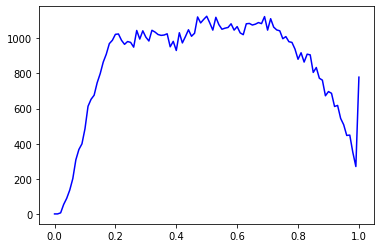

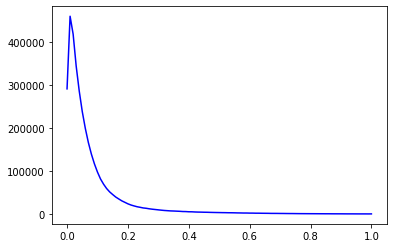

In [16]:
h_pos=np.zeros((101))
h_neg=np.zeros((101))
h_ind=0.01*np.array(range(101))

for i in range(len(x)):
    for u in range(img_height):
        for v in range(img_height):
            if y[i][u,v]==1:
                h_pos[int(np.floor(100*x[i][u,v]))]+=1
            else:
                h_neg[int(np.floor(100*x[i][u,v]))]+=1

plt.plot(h_ind,h_pos,color='blue')
plt.show()
plt.plot(h_ind,h_neg,color='blue')
plt.show()

In [17]:
opt_limits=np.concatenate((l_train,l_test),axis=0)
opt_dices=computeDicesFromPredictions(x,y,opt_limits)
print(np.median(opt_dices))

0.9686517295597484


In [18]:
print(np.percentile(opt_dices,75)-np.percentile(opt_dices,25))

0.05883602121846632


Epoch 1/30
17/17 [==============================] - 16s 857ms/step - loss: 0.1277 - val_loss: 0.0752
Epoch 2/30
17/17 [==============================] - 14s 828ms/step - loss: 0.0607 - val_loss: 0.0692
Epoch 3/30
17/17 [==============================] - 14s 815ms/step - loss: 0.0553 - val_loss: 0.0736
Epoch 4/30
17/17 [==============================] - 13s 791ms/step - loss: 0.0527 - val_loss: 0.0743
Epoch 5/30
17/17 [==============================] - 14s 827ms/step - loss: 0.0540 - val_loss: 0.0692
Epoch 6/30
17/17 [==============================] - 12s 727ms/step - loss: 0.0499 - val_loss: 0.0749
Epoch 7/30
17/17 [==============================] - 14s 825ms/step - loss: 0.0485 - val_loss: 0.0767
Epoch 8/30
17/17 [==============================] - 14s 832ms/step - loss: 0.0463 - val_loss: 0.0739
Epoch 9/30
17/17 [==============================] - 12s 728ms/step - loss: 0.0449 - val_loss: 0.0631
Epoch 10/30
17/17 [==============================] - 13s 745ms/step - loss: 0.0473 - val_lo

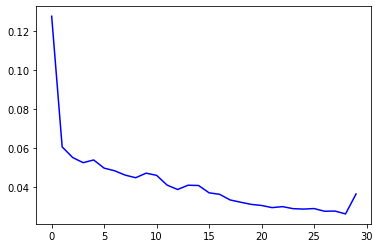

In [159]:
def unetForSegmentation():

    #U-Net model
    inputs = tf.keras.layers.Input(shape=(img_height,img_height,1))

    #Contraction path
    c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(inputs)
    c1 = tf.keras.layers.Dropout(0.1)(c1)
    c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
    p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

    c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
    c2 = tf.keras.layers.Dropout(0.1)(c2)
    c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
    p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)

    c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
    c3 = tf.keras.layers.Dropout(0.2)(c3)
    c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)

    #Expansive path
    u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c3)
    u8 = tf.keras.layers.concatenate([u8, c2])
    c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
    c8 = tf.keras.layers.Dropout(0.1)(c8)
    c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)

    u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
    c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
    c9 = tf.keras.layers.Dropout(0.1)(c9)
    c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)

    outputs = tf.keras.layers.Conv2D(1, (1,1), activation='linear')(c9) #sigmoid or linear

    model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
    model.compile(optimizer='adam', loss='binary_crossentropy')

    return model

model=unetForSegmentation()
numEpochs=30
history=model.fit(x=x_train,y=y_train,epochs=numEpochs,validation_split=0.3,shuffle=True)
trainSegPredictions=model.predict(x_train)
segPredictions=model.predict(x_test)
plt.plot(range(numEpochs),history.history['loss'],color='blue')

In [171]:
s_limit=0.24
t_limits=np.array([s_limit]*len(y_train))
t_s_dices=computeDicesFromPredictions(trainSegPredictions,y_train,t_limits)
print(np.median(t_s_dices))
#find when highest!!!

0.6666666666666666


In [172]:
limits=np.array([s_limit]*len(y_test))
s_dices=computeDicesFromPredictions(segPredictions,y_test,limits)
print(np.median(s_dices))

0.59375


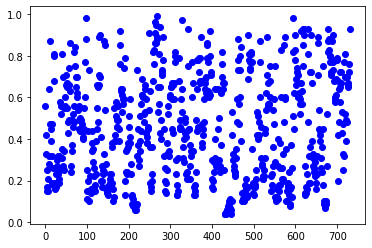

In [31]:
plt.scatter(np.arange(0,len(l_train)), l_train, color='blue')

Epoch 1/15
17/17 [==============================] - 5s 233ms/step - loss: 0.0448 - mean_squared_error: 0.0448 - val_loss: 0.0451 - val_mean_squared_error: 0.0451
Epoch 2/15
17/17 [==============================] - 4s 236ms/step - loss: 0.0324 - mean_squared_error: 0.0324 - val_loss: 0.0360 - val_mean_squared_error: 0.0360
Epoch 3/15
17/17 [==============================] - 4s 222ms/step - loss: 0.0226 - mean_squared_error: 0.0226 - val_loss: 0.0178 - val_mean_squared_error: 0.0178
Epoch 4/15
17/17 [==============================] - 4s 208ms/step - loss: 0.0191 - mean_squared_error: 0.0191 - val_loss: 0.0174 - val_mean_squared_error: 0.0174
Epoch 5/15
17/17 [==============================] - 4s 208ms/step - loss: 0.0198 - mean_squared_error: 0.0198 - val_loss: 0.0185 - val_mean_squared_error: 0.0185
Epoch 6/15
17/17 [==============================] - 3s 207ms/step - loss: 0.0156 - mean_squared_error: 0.0156 - val_loss: 0.0208 - val_mean_squared_error: 0.0208
Epoch 7/15
17/17 [==========

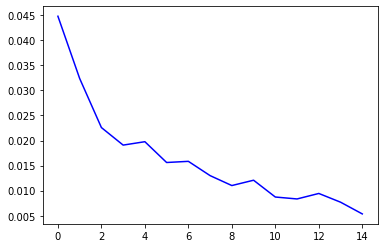

In [173]:
def Unet():
    
    model = keras.Sequential([layers.Conv2D(16, 3, activation='relu', input_shape=(img_height,img_height,1)),
                        layers.Conv2D(16, 3, activation='relu'),
                        layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
                        layers.Conv2D(32, 3, activation='relu'),
                        layers.Conv2D(32, 3, activation='relu'),
                        layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
                        layers.Conv2D(64, 3, activation='relu'),
                        layers.Conv2D(64, 3, activation='relu'),
                        layers.MaxPooling2D(strides=(2, 2)),
                        layers.Flatten(),
                        layers.Dense(64, activation='relu'),
                        layers.Dense(32, activation='relu'),
                        layers.Dense(1, activation='sigmoid')
    ]
    )

    return model

model=Unet()
numEpochs=15
model.compile(optimizer=keras.optimizers.Adam(1e-3),
            loss=keras.losses.MeanSquaredError(),
            metrics=[keras.metrics.MeanSquaredError()])
history=model.fit(x=x_train,y=l_train,epochs=numEpochs,validation_split=0.3,shuffle=True)
trainLimPredictions=model.predict(x_train)
limPredictions=model.predict(x_test)
plt.plot(range(numEpochs),history.history['loss'],color='blue')


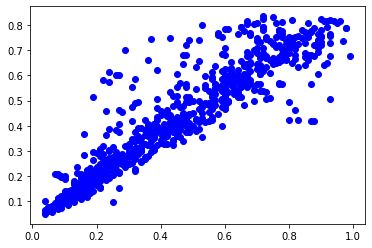

In [33]:
plt.scatter(l_train, trainLimPredictions, color='blue')

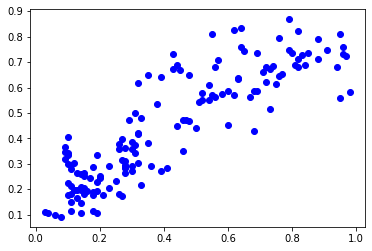

In [34]:
plt.scatter(l_test, limPredictions, color='blue')
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)
fig=plt.gcf()
#plt.savefig('fig2.png',bbox_inches='tight')
plt.show()

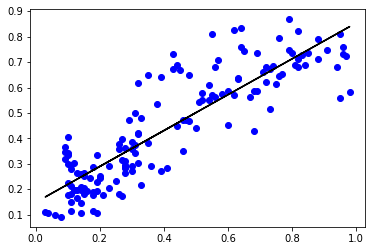

0.14915175687116608
0.704034892185278
[[1.         0.87204188]
 [0.87204188 1.        ]]
[[1.         0.76045705]
 [0.76045705 1.        ]]


In [20]:
limPredictions=np.loadtxt('tsn/ts1/ts1_limPredictions.txt')
b,a=np.polyfit(l_test,limPredictions,deg=1)
plt.scatter(l_test,limPredictions, color='blue')
plt.plot(l_test,b*l_test+a,color='black')
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)
fig=plt.gcf()
plt.savefig('fig2.png',bbox_inches='tight')
plt.show()
print(a)
print(b)
print(np.corrcoef(l_test,limPredictions))
print(np.corrcoef(l_test,limPredictions)**2)

In [174]:
t_l_dices=computeDicesFromPredictions(x_train,y_train,trainLimPredictions)
print(np.median(t_l_dices))

0.7798165137614679


In [175]:
l_dices=computeDicesFromPredictions(x_test,y_test,limPredictions)
print(np.median(l_dices))

0.594059405940594


In [176]:
l_train_1=[]
#l_test_1=[]

for i in range(len(y_train)):
    l_train_1.append(optimizeLim(trainSegPredictions[i],y_train[i]))
    print(i)

#for i in range(len(y_test)):
#    l_test_1.append(optimizeLim(segPredictions[i],y_test[i]))

l_train_1=np.array(l_train_1)
#l_test_1=np.array(l_test_1)

print(np.median(computeDicesFromPredictions(trainSegPredictions,y_train,l_train_1)))
#print(np.median(computeDicesFromPredictions(segPredictions,y_test,l_test_1)))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

Epoch 1/15
17/17 [==============================] - 5s 224ms/step - loss: 0.0353 - mean_squared_error: 0.0353 - val_loss: 0.0220 - val_mean_squared_error: 0.0220
Epoch 2/15
17/17 [==============================] - 4s 210ms/step - loss: 0.0153 - mean_squared_error: 0.0153 - val_loss: 0.0144 - val_mean_squared_error: 0.0144
Epoch 3/15
17/17 [==============================] - 4s 210ms/step - loss: 0.0135 - mean_squared_error: 0.0135 - val_loss: 0.0169 - val_mean_squared_error: 0.0169
Epoch 4/15
17/17 [==============================] - 4s 210ms/step - loss: 0.0128 - mean_squared_error: 0.0128 - val_loss: 0.0153 - val_mean_squared_error: 0.0153
Epoch 5/15
17/17 [==============================] - 4s 210ms/step - loss: 0.0116 - mean_squared_error: 0.0116 - val_loss: 0.0134 - val_mean_squared_error: 0.0134
Epoch 6/15
17/17 [==============================] - 4s 220ms/step - loss: 0.0117 - mean_squared_error: 0.0117 - val_loss: 0.0244 - val_mean_squared_error: 0.0244
Epoch 7/15
17/17 [==========

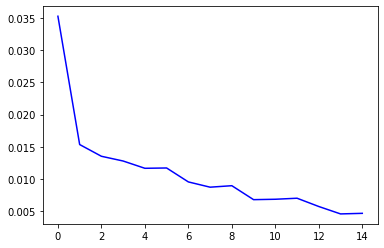

In [177]:
model=Unet()
model.compile(optimizer=keras.optimizers.Adam(1e-3),
            loss=keras.losses.MeanSquaredError(),
            metrics=[keras.metrics.MeanSquaredError()])
history=model.fit(x=trainSegPredictions,y=l_train_1,epochs=numEpochs,validation_split=0.3,shuffle=True)
trainLimSegPredictions=model.predict(trainSegPredictions)
limSegPredictions=model.predict(segPredictions)
plt.plot(range(numEpochs),history.history['loss'],color='blue')

In [178]:
t_k_dices=computeDicesFromPredictions(trainSegPredictions,y_train,trainLimSegPredictions)
print(np.median(t_k_dices))

0.782608695652174


In [179]:
k_dices=computeDicesFromPredictions(segPredictions,y_test,limSegPredictions)
print(np.median(k_dices))

0.6529209621993127


In [180]:
print(np.median(t_s_dices))
print(np.median(t_l_dices))
print(np.median(t_k_dices))

0.6666666666666666
0.7798165137614679
0.782608695652174


In [181]:
print(np.mean(s_dices))
print(np.mean(l_dices))
print(np.mean(k_dices))

0.5378445588343498
0.577648569388146
0.5718515505085219


In [182]:
print(np.median(s_dices))
print(np.median(l_dices))
print(np.median(k_dices))

0.59375
0.594059405940594
0.6529209621993127


In [183]:
print(np.percentile(s_dices,75)-np.percentile(s_dices,25))
print(np.percentile(l_dices,75)-np.percentile(l_dices,25))
print(np.percentile(k_dices,75)-np.percentile(k_dices,25))

0.4331749305119699
0.3938953488372093
0.4470588235294118


In [185]:
print(wilcoxon(x=s_dices,y=l_dices))
print(wilcoxon(x=s_dices,y=k_dices))
print(wilcoxon(x=l_dices,y=k_dices))

WilcoxonResult(statistic=4275.0, pvalue=0.07853361653220099)
WilcoxonResult(statistic=3703.0, pvalue=0.007348434873824316)
WilcoxonResult(statistic=4851.0, pvalue=0.9765178699124175)


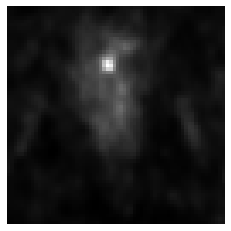

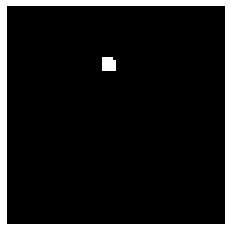

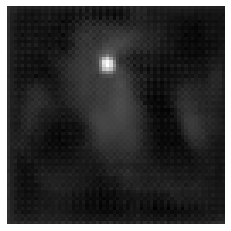

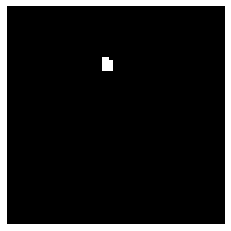

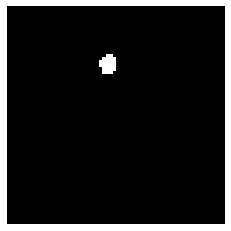

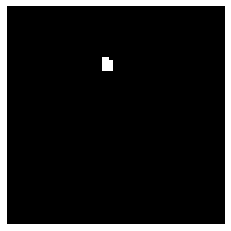

0.3
[0.43985656]
[0.3131984]
0.8461538461538461
0.7894736842105263
0.8461538461538461
0.5
1.0


In [46]:
i=0

plt.imshow(cv2.rotate(x_test[i],cv2.cv2.ROTATE_90_CLOCKWISE),cmap='gray')
fig=plt.gcf()
plt.axis('off')
plt.savefig('fig3a.png',bbox_inches='tight')
plt.show()

plt.imshow(cv2.rotate(y_test[i],cv2.cv2.ROTATE_90_CLOCKWISE),cmap='gray')
fig=plt.gcf()
plt.axis('off')
plt.savefig('fig3b.png',bbox_inches='tight')
plt.show()

plt.imshow(cv2.rotate(segPredictions[i],cv2.cv2.ROTATE_90_CLOCKWISE),cmap='gray')
fig=plt.gcf()
plt.axis('off')
plt.savefig('fig3c.png',bbox_inches='tight')
plt.show()

plt.imshow(cv2.rotate(sliceIntoBinaryMask(segPredictions[i],0.31),cv2.cv2.ROTATE_90_CLOCKWISE),cmap='gray')
fig=plt.gcf()
plt.axis('off')
plt.savefig('fig3d.png',bbox_inches='tight')
plt.show()

plt.imshow(cv2.rotate(sliceIntoBinaryMask(x_test[i],limPredictions[i]),cv2.cv2.ROTATE_90_CLOCKWISE),cmap='gray')
fig=plt.gcf()
plt.axis('off')
plt.savefig('fig3e.png',bbox_inches='tight')
plt.show()

plt.imshow(cv2.rotate(sliceIntoBinaryMask(segPredictions[i],limSegPredictions[i]),cv2.cv2.ROTATE_90_CLOCKWISE),cmap='gray')
fig=plt.gcf()
plt.axis('off')
plt.savefig('fig3f.png',bbox_inches='tight')
plt.show()

print(s_limit)
print(limPredictions[i])
print(limSegPredictions[i])

print(s_dices[i])
print(l_dices[i])
print(k_dices[i])

print(l_test[i])
print(opt_dices[i])

In [186]:
np.savetxt('ts{}_s_dices.txt'.format(tsn), s_dices)
np.savetxt('ts{}_l_dices.txt'.format(tsn), l_dices)
np.savetxt('ts{}_k_dices.txt'.format(tsn), k_dices)
np.savetxt('ts{}_trainLimPredictions.txt'.format(tsn), trainLimPredictions)
np.savetxt('ts{}_limPredictions.txt'.format(tsn), limPredictions)
np.savetxt('ts{}_trainLimSegPredictions.txt'.format(tsn), trainLimSegPredictions)
np.savetxt('ts{}_limSegPredictions.txt'.format(tsn), limSegPredictions)

for i in range(len(trainSegPredictions)):
    np.savetxt('ts{}_{}_trainSegPredictions.txt'.format(tsn,i), trainSegPredictions[i][:,:,0])

for i in range(len(segPredictions)):
    np.savetxt('ts{}_{}_segPredictions.txt'.format(tsn,i), segPredictions[i][:,:,0])

In [187]:
d1=np.loadtxt('C:/Users/Oona/Documents/Tpc/prc/lim/tsn/ts1/ts1_s_dices.txt')
d2=np.loadtxt('C:/Users/Oona/Documents/Tpc/prc/lim/tsn/ts2/ts2_s_dices.txt')
d3=np.loadtxt('C:/Users/Oona/Documents/Tpc/prc/lim/tsn/ts3/ts3_s_dices.txt')
d4=np.loadtxt('C:/Users/Oona/Documents/Tpc/prc/lim/tsn/ts4/ts4_s_dices.txt')
d5=np.loadtxt('C:/Users/Oona/Documents/Tpc/prc/lim/tsn/ts5/ts5_s_dices.txt')
d6=np.loadtxt('C:/Users/Oona/Documents/Tpc/prc/lim/tsn/ts6/ts6_s_dices.txt')
s_dices=np.concatenate((d1,d2,d3,d4,d5,d6))

In [188]:
d1=np.loadtxt('C:/Users/Oona/Documents/Tpc/prc/lim/tsn/ts1/ts1_l_dices.txt')
d2=np.loadtxt('C:/Users/Oona/Documents/Tpc/prc/lim/tsn/ts2/ts2_l_dices.txt')
d3=np.loadtxt('C:/Users/Oona/Documents/Tpc/prc/lim/tsn/ts3/ts3_l_dices.txt')
d4=np.loadtxt('C:/Users/Oona/Documents/Tpc/prc/lim/tsn/ts4/ts4_l_dices.txt')
d5=np.loadtxt('C:/Users/Oona/Documents/Tpc/prc/lim/tsn/ts5/ts5_l_dices.txt')
d6=np.loadtxt('C:/Users/Oona/Documents/Tpc/prc/lim/tsn/ts6/ts6_l_dices.txt')
l_dices=np.concatenate((d1,d2,d3,d4,d5,d6))

In [189]:
d1=np.loadtxt('C:/Users/Oona/Documents/Tpc/prc/lim/tsn/ts1/ts1_k_dices.txt')
d2=np.loadtxt('C:/Users/Oona/Documents/Tpc/prc/lim/tsn/ts2/ts2_k_dices.txt')
d3=np.loadtxt('C:/Users/Oona/Documents/Tpc/prc/lim/tsn/ts3/ts3_k_dices.txt')
d4=np.loadtxt('C:/Users/Oona/Documents/Tpc/prc/lim/tsn/ts4/ts4_k_dices.txt')
d5=np.loadtxt('C:/Users/Oona/Documents/Tpc/prc/lim/tsn/ts5/ts5_k_dices.txt')
d6=np.loadtxt('C:/Users/Oona/Documents/Tpc/prc/lim/tsn/ts6/ts6_k_dices.txt')
k_dices=np.concatenate((d1,d2,d3,d4,d5,d6))

In [190]:
print(np.median(s_dices))
print(np.median(l_dices))
print(np.median(k_dices))

0.7086848635235732
0.717948717948718
0.6885245901639344


In [191]:
print(np.percentile(s_dices,75)-np.percentile(s_dices,25))
print(np.percentile(l_dices,75)-np.percentile(l_dices,25))
print(np.percentile(k_dices,75)-np.percentile(k_dices,25))

0.39424279088525915
0.40519745696825815
0.3825998670165023


In [192]:
print(wilcoxon(x=s_dices,y=l_dices))
print(wilcoxon(x=s_dices,y=k_dices))
print(wilcoxon(x=l_dices,y=k_dices))

WilcoxonResult(statistic=161991.0, pvalue=0.0018094663289462034)
WilcoxonResult(statistic=160292.0, pvalue=0.04727536670102698)
WilcoxonResult(statistic=153818.5, pvalue=8.452080024764259e-05)
